In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [6]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 1)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [9]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Dropout

2025-12-29 09:28:24.591791: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767000504.814118      17 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767000504.877907      17 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1767000505.402869      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767000505.402925      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767000505.402929      17 computation_placer.cc:177] computation placer alr

In [10]:
model = Sequential()

model.add(Dense(32, activation = 'relu', input_dim = 8))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-12-29 09:28:41.339813: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [11]:
model.fit(X_train_scaled, y_train, batch_size = 32, epochs = 100, validation_data =(X_test_scaled, y_test))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6910 - loss: 0.6379 - val_accuracy: 0.7208 - val_loss: 0.5944
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7328 - loss: 0.5920 - val_accuracy: 0.7662 - val_loss: 0.5624
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7725 - loss: 0.5464 - val_accuracy: 0.7662 - val_loss: 0.5408
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7766 - loss: 0.5331 - val_accuracy: 0.7792 - val_loss: 0.5263
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7482 - loss: 0.5203 - val_accuracy: 0.7727 - val_loss: 0.5162
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7786 - loss: 0.4963 - val_accuracy: 0.7727 - val_loss: 0.5075
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7767 - loss: 0.4948 - val_accuracy: 0.7857 - val_loss: 0.5007
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7841 - loss: 0.4893 - val_accuracy: 0.7792 - 

In [12]:
import kerastuner as kt

/tmp/ipykernel_17/1654478174.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [13]:
def build_model(hp):
    model = Sequential()
    
    model.add(Dense(32, activation='relu', input_dim = 8))
    model.add(Dense(1, activation ='sigmoid'))

    optimizer=hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop', 'adadelta'])               

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [14]:
tuner = kt.RandomSearch(build_model, objective = 'val_accuracy', max_trials=5)

In [15]:
tuner.search(X_train_scaled, y_train, epochs = 5, validation_data=(X_test_scaled, y_test))

Trial 4 Complete [00h 00m 02s]
val_accuracy: 0.7662337422370911

Best val_accuracy So Far: 0.7662337422370911
Total elapsed time: 00h 00m 09s


In [16]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop'}

In [17]:
model = tuner.get_best_models(num_models = 1)[0]

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.fit(X_train_scaled, y_train, batch_size = 32, epochs = 100, initial_epoch=6, validation_data=(X_test_scaled, y_test))

Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7450 - loss: 0.5327 - val_accuracy: 0.7727 - val_loss: 0.5057
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7892 - loss: 0.4911 - val_accuracy: 0.7597 - val_loss: 0.4930
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7403 - loss: 0.5114 - val_accuracy: 0.7662 - val_loss: 0.4845
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7533 - loss: 0.5101 - val_accuracy: 0.7662 - val_loss: 0.4780
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7727 - loss: 0.4858 - val_accuracy: 0.7597 - val_loss: 0.4731
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7535 - loss: 0.4930 - val_accuracy: 0.7727 - val_loss: 0.4679
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7781 - loss: 0.4656 - val_accuracy: 0.7662 - val_loss: 0.4635
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7730 - loss: 0.4720 - val_accuracy: 0.75

In [20]:
def build_model(hp):

    model = Sequential()

    units = hp.Int('units', 8,128)

    model.add(Dense(units=units, activation='relu', input_dim = 8))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [21]:
tuner = kt.RandomSearch(build_model, objective = 'val_accuracy', max_trials=5, directory='mydir1')

In [22]:
tuner.search(X_train_scaled, y_train, epochs=5, validation_data =(X_test_scaled, y_test))

Trial 5 Complete [00h 00m 02s]
val_accuracy: 0.7922077775001526

Best val_accuracy So Far: 0.8116883039474487
Total elapsed time: 00h 00m 11s


In [23]:
tuner.get_best_hyperparameters()[0].values

{'units': 89}

In [24]:
model = tuner.get_best_models(num_models=1)[0]

In [25]:
model.fit(X_train_scaled, y_train, epochs = 100, initial_epoch =5, validation_data=(X_test_scaled, y_test))

Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7541 - loss: 0.5361 - val_accuracy: 0.7792 - val_loss: 0.4914
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7557 - loss: 0.4986 - val_accuracy: 0.7727 - val_loss: 0.4786
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7778 - loss: 0.4701 - val_accuracy: 0.7792 - val_loss: 0.4703
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7682 - loss: 0.4776 - val_accuracy: 0.7857 - val_loss: 0.4674
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7654 - loss: 0.4662 - val_accuracy: 0.7922 - val_loss: 0.4657
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7979 - loss: 0.4383 - val_accuracy: 0.7857 - val_loss: 0.4660
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7853 - loss: 0.4706 - val_accuracy: 0.7922 - val_loss: 0.4634
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7747 - loss: 0.4685 - val_accuracy: 0.785

In [26]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(72, activation='relu', input_dim=8))
    for i in range(hp.Int('num_layer', min_value=1, max_value=10)):
        model.add(Dense(72,activation='relu'))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer = 'rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [27]:
tuner = kt.RandomSearch(build_model, objective='val_accuracy', 
                       max_trials = 3, directory = 'mydir2')

In [28]:
tuner.search(X_train_scaled, y_train, epochs = 5, validation_data=(X_test_scaled, y_test))

Trial 3 Complete [00h 00m 04s]
val_accuracy: 0.798701286315918

Best val_accuracy So Far: 0.8051947951316833
Total elapsed time: 00h 00m 10s


In [29]:
tuner.get_best_hyperparameters()[0].values

{'num_layer': 3}

In [30]:
model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [31]:
model.fit(X_train_scaled, y_train, epochs = 100, initial_epoch = 5,validation_data=(X_test_scaled, y_test))

Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7716 - loss: 0.4854 - val_accuracy: 0.7857 - val_loss: 0.4727
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7815 - loss: 0.4713 - val_accuracy: 0.7857 - val_loss: 0.5068
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7921 - loss: 0.4415 - val_accuracy: 0.7857 - val_loss: 0.5034
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8005 - loss: 0.4367 - val_accuracy: 0.7987 - val_loss: 0.4724
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7883 - loss: 0.4260 - val_accuracy: 0.7727 - val_loss: 0.4760
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8090 - loss: 0.4280 - val_accuracy: 0.7662 - val_loss: 0.4696
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7865 - loss: 0.3909 - val_accuracy: 0.7727 - val_loss: 0.5036
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7856 - loss: 0.4407 - val_accuracy: 0.779

In [32]:
def build_model(hp):
    model = Sequential()

    counter = 0
    
    for i in range(hp.Int('num_layer', min_value = 1, max_value = 10)):
        if counter == 0:
            model.add(Dense(
                hp.Int('units'+str(i), min_value = 8, max_value=128, step=8),
                activation = hp.Choice('activation'+ str(i), values=['relu', 'tanh','sigmoid' ]),
                input_dim = 8
            ))
            model.add(Dropout(hp.Choice('dropout'+str(i), values=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
        else:
            model.add(Dense(
                hp.Int('units'+str(i), min_value = 8, max_value=128, step=8),
                activation = hp.Choice('activation'+ str(i), values=['relu', 'tanh','sigmoid' ])
            ))
            model.add(Dropout(hp.Choice('dropout'+str(i), values=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
        counter += 1

    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer = hp.Choice('optimizer', values = ['rmsprop','adam', 'sgd', 'nadam', 'adadelta']), loss='binary_crossentropy', metrics = ['accuracy'])
    return model

        

In [33]:
tuner = kt.RandomSearch(build_model, objective = 'val_accuracy', max_trials = 3, directory='mydir_final2')

In [34]:
tuner.search(X_train_scaled, y_train, epochs = 5, validation_data = (X_test_scaled, y_test))

Trial 3 Complete [00h 00m 05s]
val_accuracy: 0.6428571343421936

Best val_accuracy So Far: 0.6428571343421936
Total elapsed time: 00h 00m 12s


In [35]:
tuner.get_best_hyperparameters()[0].values

{'num_layer': 9,
 'units0': 40,
 'activation0': 'sigmoid',
 'dropout0': 0.8,
 'optimizer': 'sgd',
 'units1': 8,
 'activation1': 'relu',
 'dropout1': 0.1,
 'units2': 8,
 'activation2': 'relu',
 'dropout2': 0.1,
 'units3': 8,
 'activation3': 'relu',
 'dropout3': 0.1,
 'units4': 8,
 'activation4': 'relu',
 'dropout4': 0.1,
 'units5': 8,
 'activation5': 'relu',
 'dropout5': 0.1,
 'units6': 8,
 'activation6': 'relu',
 'dropout6': 0.1,
 'units7': 8,
 'activation7': 'relu',
 'dropout7': 0.1,
 'units8': 8,
 'activation8': 'relu',
 'dropout8': 0.1}

In [36]:
model = tuner.get_best_models(num_models = 1)[0]

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(
    monitor = 'val_accuracy',
    min_delta = 0.00001,
    patience = 30,
    verbose = 1,
    baseline=None,
    restore_best_weights=True,
    mode = 'auto'
)

In [38]:
history = model.fit(X_train_scaled, y_train,epochs = 500, initial_epoch = 5, validation_data = (X_test_scaled, y_test), callbacks = callback )

Epoch 6/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6517 - loss: 0.6707 - val_accuracy: 0.6429 - val_loss: 0.6707
Epoch 7/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6513 - loss: 0.6698 - val_accuracy: 0.6429 - val_loss: 0.6653
Epoch 8/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6359 - loss: 0.6646 - val_accuracy: 0.6429 - val_loss: 0.6620
Epoch 9/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6210 - loss: 0.6692 - val_accuracy: 0.6429 - val_loss: 0.6588
Epoch 10/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6300 - loss: 0.6697 - val_accuracy: 0.6429 - val_loss: 0.6563
Epoch 11/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6491 - loss: 0.6486 - val_accuracy: 0.6429 - val_loss: 0.6547
Epoch 12/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6568 - loss: 0.6523 - val_accuracy: 0.6429 - val_loss: 0.6529
Epoch 13/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6827 - loss: 0.6395 - val_accuracy: 0.642

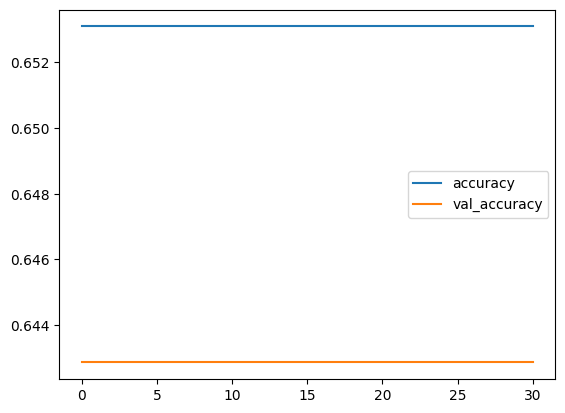

In [39]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()